<a href="https://colab.research.google.com/github/LordHandLee/HonCSC499_detect_falls_soccer/blob/main/Copy_of_ReconstructedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes

In [4]:
pip install tensorflow

In [2]:
import autokeras as ak
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob

import matplotlib.pyplot as plt
import cv2
from skimage import data,io
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import tensorflow.keras.layers
from autokeras.utils import data_utils

In [3]:
base_model = keras.applications.efficientnet.EfficientNetB1(
    include_top=False, #false
    weights='imagenet',
    input_shape=(224,224,3),
)


27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:


#




@keras.utils.register_keras_serializable()
class CastToFloat32(tensorflow.keras.layers.Layer):
    def get_config(self):
        return super().get_config()

    def call(self, inputs):
        return data_utils.cast_to_float32(inputs)

    def adapt(self, data):
        return

In [5]:
base_model.trainable = True

In [6]:
inputs = keras.Input(shape=(150,150,3))
#x = base_model(inputs, training=False)

#x = tf.cast(inputs, tf.int32)
x = CastToFloat32()(inputs)

#x = CastToFloat32(inputs, shape=(None, 150, 150, 3))

x = keras.layers.Normalization(axis=-1, mean=None, variance=None, invert=False)(x)

x = keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='reflect', fill_value=0.0, interpolation='bilinear', seed=None)(x)

x = keras.layers.RandomFlip(mode='horizontal', seed=None)(x)

x = keras.layers.Resizing(height=224, width=224, interpolation='bilinear', crop_to_aspect_ratio=False)(x)

x = base_model(x, training=True)

x = keras.layers.GlobalAveragePooling2D(data_format='channels_last', keepdims=False)(x)

x = keras.layers.Dense(1, activation='linear', use_bias=True, kernel_initializer='GlorotUniform', bias_initializer='zeros', kernel_regularizer= None, bias_regularizer= None, activity_regularizer= None, kernel_constraint= None, bias_constraint= None)(x)


#dropout?

outputs = keras.layers.Activation('sigmoid')(x)

model = keras.Model(inputs, outputs)




#  random_flip (RandomFlip)    (None, 150, 150, 3)       0

#  resizing (Resizing)         (None, 224, 224, 3)       0

#  efficientnetb1 (Functional  (None, None, None, 1280   6575239
#  )                           )

#  global_average_pooling2d (  (None, 1280)              0
#  GlobalAveragePooling2D)

#  dense (Dense)               (None, 1)                 1281

#  classification_head_1 (Ac



In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 cast_to_float32_1 (CastToF  (None, 150, 150, 3)       0         
 loat32)                                                         
                                                                 
 normalization_2 (Normaliza  (None, 150, 150, 3)       7         
 tion)                                                           
                                                                 
 random_translation_1 (Rand  (None, 150, 150, 3)       0         
 omTranslation)                                                  
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                             

In [28]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.16.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss=keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[keras.metrics.BinaryAccuracy()])
# keras.metrics.Precision(),
                              #keras.metrics.Recall(),
                              #tfa.metrics.F1Score(num_classes=1,average='macro',
                                                  #threshold=0.5)

In [8]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=30)

In [9]:
from google.colab import drive

In [10]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [11]:
data_dir = "/content/drive/MyDrive/honor_thesis/image_depo/"

In [12]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)
width = 150
height = 150
trainDatagen = datagen.flow_from_directory(directory=data_dir, target_size=(width, height),
                                           class_mode='binary',
                                           batch_size=16,
                                           subset='training')
valDatagen = datagen.flow_from_directory(directory=data_dir, target_size=(width, height),
                                           class_mode='binary',
                                           batch_size=16,
                                           subset='validation', shuffle=False)

Found 611 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [21]:
ls "/content/drive/MyDrive/honor_thesis/image_depo/"

fallen_images/  model_autokeras.h5  model_autokeras.keras  standing_images/


In [22]:
history = model.fit(trainDatagen, steps_per_epoch = len(trainDatagen),
                    epochs=500, validation_data = valDatagen,
                    validation_steps = len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 392s 9s/step - loss: 0.9024 - binary_accuracy: 0.5974 - val_loss: 1.1385 - val_binary_accuracy: 0.5769
Epoch 2/500
39/39 [==============================] - 4s 104ms/step - loss: 0.7670 - binary_accuracy: 0.5957 - val_loss: 0.6855 - val_binary_accuracy: 0.7077
Epoch 3/500
39/39 [==============================] - 4s 105ms/step - loss: 0.4442 - binary_accuracy: 0.7971 - val_loss: 0.5780 - val_binary_accuracy: 0.6615
Epoch 4/500
39/39 [==============================] - 4s 102ms/step - loss: 0.5861 - binary_accuracy: 0.7152 - val_loss: 0.4276 - val_binary_accuracy: 0.8192
Epoch 5/500
39/39 [==============================] - 4s 103ms/step - loss: 0.3057 - binary_accuracy: 0.8887 - val_loss: 0.3759 - val_binary_accuracy: 0.8423
Epoch 6/500
39/39 [==============================] - 4s 104ms/step - loss: 0.2562 - binary_accuracy: 0.9067 - val_loss: 0.2821 - val_binary_accuracy: 0.8962
Epoch 7/500
39/39 [==============================] - 4s 103

In [ ]:
history = model.fit(trainDatagen, steps_per_epoch = len(trainDatagen),
                    epochs=500, validation_data = valDatagen,
                    validation_steps = len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 63s 152ms/step - loss: 0.9531 - binary_accuracy: 0.5123 - val_loss: 0.7326 - val_binary_accuracy: 0.5000
Epoch 2/500
39/39 [==============================] - 4s 89ms/step - loss: 0.7088 - binary_accuracy: 0.5548 - val_loss: 0.7354 - val_binary_accuracy: 0.4962
Epoch 3/500
39/39 [==============================] - 4s 90ms/step - loss: 0.7076 - binary_accuracy: 0.5417 - val_loss: 0.7012 - val_binary_accuracy: 0.5038
Epoch 4/500
39/39 [==============================] - 3s 87ms/step - loss: 0.7132 - binary_accuracy: 0.5106 - val_loss: 0.6888 - val_binary_accuracy: 0.5462
Epoch 5/500
39/39 [==============================] - 3s 88ms/step - loss: 0.6692 - binary_accuracy: 0.5679 - val_loss: 0.7334 - val_binary_accuracy: 0.5538
Epoch 6/500
39/39 [==============================] - 3s 89ms/step - loss: 0.6771 - binary_accuracy: 0.5646 - val_loss: 0.6916 - val_binary_accuracy: 0.5538
Epoch 7/500
39/39 [==============================] - 4s 89ms/s

In [31]:
history = model.fit(trainDatagen, steps_per_epoch = 29,
                    epochs=500, validation_data = valDatagen,
                    validation_steps = 29,
                    callbacks=[early_stop])

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - binary_accuracy: 0.9754 - loss: 0.0914 - val_binary_accuracy: 0.9308 - val_loss: 0.2334
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - binary_accuracy: 0.9867 - loss: 0.0803 - val_binary_accuracy: 0.9308 - val_loss: 0.2225
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - binary_accuracy: 0.9579 - loss: 0.1001 - val_binary_accuracy: 0.9423 - val_loss: 0.2090
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - binary_accuracy: 0.9570 - loss: 0.1293 - val_binary_accuracy: 0.9423 - val_loss: 0.2034
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - binary_accuracy: 0.9911 - loss: 0.0756 - val_binary_accuracy: 0.9423 - val_loss: 0.1885
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - binary_accuracy: 0.9483 - loss: 0.1133 - val_binary_accuracy: 0.9462 - val_loss: 0.1867
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - binary_accuracy: 0.9736 - loss: 0.0821 - val_binary_accuracy: 0.9462 - val_loss: 0.1733

In [13]:
history = model.fit(trainDatagen, steps_per_epoch = 29,
                    epochs=500, validation_data = valDatagen,
                    validation_steps = 29,
                    callbacks=[early_stop])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - binary_accuracy: 0.5979 - loss: 0.6709 - val_binary_accuracy: 0.5000 - val_loss: 0.6704
Epoch 2/500


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - binary_accuracy: 0.6857 - loss: 0.5894 - val_binary_accuracy: 0.5000 - val_loss: 0.6664
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - binary_accuracy: 0.6892 - loss: 0.6050 - val_binary_accuracy: 0.5000 - val_loss: 0.6538
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - binary_accuracy: 0.7560 - loss: 0.5393 - val_binary_accuracy: 0.5000 - val_loss: 0.6585
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - binary_accuracy: 0.7782 - loss: 0.5445 - val_binary_accuracy: 0.5000 - val_loss: 0.6591
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - binary_accuracy: 0.8516 - loss: 0.4601 - val_binary_accuracy: 0.5000 - val_loss: 0.6578
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - binary_accuracy: 0.8061 - loss: 0.4969 - val_binary_accuracy: 0.4577 - val_loss: 0.6589
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - binary_accuracy: 0.8369 - loss: 0.4565 - val_binary_accuracy: 0.4077 - val_loss: 0.6588
Epoch 9/500

In [14]:
import sklearn

In [16]:
predIdxs = model.predict(valDatagen)

predIdxs = np.where(predIdxs > 0.5, 1, 0)#np.argmax(predIdxs, axis=1)

print(sklearn.metrics.classification_report(valDatagen.labels, predIdxs,
                            target_names=["class 0", "class 1"]))

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94       130
     class 1       0.99      0.88      0.93       130

    accuracy                           0.94       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.94      0.94      0.94       260



In [35]:
valDatagen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [48]:
model.evaluate(valDatagen)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - binary_accuracy: 0.9495 - loss: 0.1778


[0.16432452201843262, 0.949999988079071]

In [38]:
predIdxs = model.predict(valDatagen)
predIdxs

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


array([[5.77470579e-04],
       [8.79210591e-01],
       [7.58826196e-01],
       [1.17680520e-01],
       [8.19879770e-01],
       [4.96688345e-03],
       [9.80629623e-01],
       [1.25986440e-02],
       [2.68617719e-02],
       [9.99376476e-01],
       [1.09912073e-02],
       [9.91177976e-01],
       [1.98824406e-02],
       [9.90717947e-01],
       [8.29173177e-02],
       [7.46831179e-01],
       [1.86946476e-03],
       [9.66134846e-01],
       [6.46717548e-01],
       [6.91697700e-04],
       [9.38202441e-01],
       [1.23661116e-01],
       [2.04947032e-03],
       [1.03460625e-03],
       [6.11631811e-01],
       [9.44872439e-01],
       [1.19993044e-02],
       [9.88748193e-01],
       [4.41886485e-03],
       [9.19049203e-01],
       [4.92441887e-03],
       [1.75216943e-01],
       [9.07056212e-01],
       [9.86138165e-01],
       [9.89260674e-01],
       [9.99037027e-01],
       [1.72151288e-03],
       [9.85812187e-01],
       [2.66776630e-03],
       [7.85608709e-01],


In [17]:
import matplotlib.pyplot as plt
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

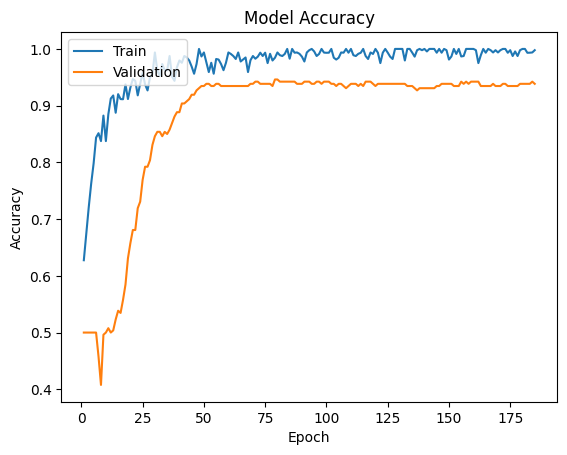

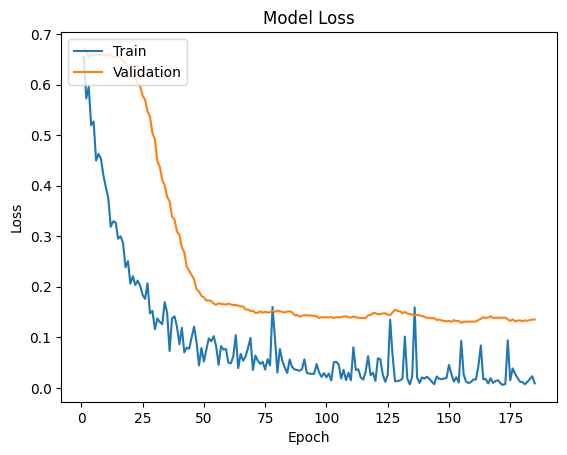

In [19]:
plotLearningCurve(history,185)